In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
# %matplotlib inline

import pandas as pd


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Article_EV/ev_charging_patterns.csv')
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [4]:
unique_values = df['Vehicle Model'].unique()
unique_values

array(['BMW i3', 'Hyundai Kona', 'Chevy Bolt', 'Nissan Leaf',
       'Tesla Model 3'], dtype=object)

In [5]:
unique_values = df['Battery Capacity (kWh)'].unique()
unique_values

array([108.46300741, 100.        ,  75.        ,  50.        ,
        85.        ,  62.        ,  97.68181223,  79.79920376,
        48.79648264,  76.87610038,  69.88407425, 124.31591139,
        59.83272651,  48.05069473,  24.59992215,  77.29894529,
        95.15365777, 147.39535434,  63.09631665,  93.27378067,
        48.46959856,  93.09486955,  50.87061708,  58.0121307 ,
       102.94949428,  95.69778087, 102.83943001,  89.03206383,
        81.65318205,  46.5379115 ,  27.03325783, 120.51063277,
        94.82402915,  45.38021848, 143.47520974,  10.18928677,
        78.38373536,  65.04709891,  33.37702357,  59.79413925,
         6.16889584,  45.62653203,  77.60847805,  48.63693125,
        60.78928025,  71.64548707,  46.87679655,  69.44504561,
         3.9765965 ,   1.53280653,  67.54202075, 127.28027404,
       107.43195455,  52.33224826,  39.29742253, 129.52415942,
         3.83851807,  78.84320421, 104.91720077,  51.40198312,
        99.53686937, 174.40966769,  54.37091028,  87.48

In [6]:
# Model başına sabit batarya kapasitelerini içeren harita
battery_capacity_map = {
    "BMW i3": 42.2,
    "Hyundai Kona": 50.0,
    "Chevy Bolt": 65.0,
    "Nissan Leaf": 40.0,
    "Tesla Model 3": 66.0
}

# Batarya kapasitesini güncellemek için map işlemi
df["Battery Capacity (kWh)"] = df["Vehicle Model"].map(battery_capacity_map)

# Güncellenmiş veri setini kontrol etme
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [7]:
unique_values = df['Battery Capacity (kWh)'].unique()
unique_values

array([42.2, 50. , 65. , 40. , 66. ])

In [8]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,42.2,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,50.0,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,65.0,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.0,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.0,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Vehicle Model' column (in place)
df['Vehicle Model'] = label_encoder.fit_transform(df['Vehicle Model'])

# Display the encoded unique values
unique_values = df['Vehicle Model'].unique()
print(unique_values)


[0 2 1 3 4]


In [10]:
unique_values = df['Battery Capacity (kWh)'].unique()
unique_values

array([42.2, 50. , 65. , 40. , 66. ])

In [11]:
# Round the 'Battery Capacity (kWh)' column to the nearest tenth and remove decimal points
df['Battery Capacity (kWh)'] = df['Battery Capacity (kWh)'].round(-1).astype(int)

# Display the unique values after rounding
unique_values = df['Battery Capacity (kWh)'].unique()
print(unique_values)


[40 50 60 70]


In [12]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,0,40,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,2,50,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,1,60,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,2,50,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,2,50,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   int64  
 2   Battery Capacity (kWh)                    1320 non-null   int64  
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [14]:
df.describe()


,Vehicle Model,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,2.036364,52.257576,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,1.421767,11.768310,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,0.000000,40.000000,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,1.000000,40.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,2.000000,50.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,3.000000,60.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,4.000000,70.000000,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [15]:
df.isna().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [16]:
unique_values = df['Charging Station Location'].unique()
print(unique_values)

['Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'New York']


In [17]:

# Apply label encoding to the 'Vehicle Model' column (in place)
df['Charging Station Location'] = label_encoder.fit_transform(df['Charging Station Location'])

# Display the encoded unique values
unique_values = df['Charging Station Location'].unique()
print(unique_values)


[1 4 2 0 3]


In [18]:
import pandas as pd

# Assuming df is your DataFrame
# Convert 'Charging Start Time' and 'Charging End Time' to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate the time difference (End Time - Start Time)
df['time_difference'] = df['Charging End Time'] - df['Charging Start Time']

# Extract the time difference in minutes
df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60  # in minutes

# Display the DataFrame with the new time difference column in minutes
print(df[['Charging Start Time', 'Charging End Time', 'time_difference_minutes']])


     Charging Start Time   Charging End Time  time_difference_minutes
0    2024-01-01 00:00:00 2024-01-01 00:39:00                     39.0
1    2024-01-01 01:00:00 2024-01-01 03:01:00                    121.0
2    2024-01-01 02:00:00 2024-01-01 04:48:00                    168.0
3    2024-01-01 03:00:00 2024-01-01 06:42:00                    222.0
4    2024-01-01 04:00:00 2024-01-01 05:46:00                    106.0
...                  ...                 ...                      ...
1315 2024-02-24 19:00:00 2024-02-24 20:30:00                     90.0
1316 2024-02-24 20:00:00 2024-02-24 20:44:00                     44.0
1317 2024-02-24 21:00:00 2024-02-24 23:03:00                    123.0
1318 2024-02-24 22:00:00 2024-02-24 23:20:00                     80.0
1319 2024-02-24 23:00:00 2024-02-24 23:56:00                     56.0

[1320 rows x 3 columns]


In [19]:
df.drop('time_difference', axis=1, inplace=True)

In [20]:
df.drop('Charging Start Time', axis=1, inplace=True)

In [21]:
df.drop('Charging End Time', axis=1, inplace=True)

In [22]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes
0,User_1,0,40,Station_391,1,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,39.0
1,User_2,2,50,Station_428,4,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,121.0
2,User_3,1,60,Station_181,4,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,168.0
3,User_4,2,50,Station_327,1,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,222.0
4,User_5,2,50,Station_108,2,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,3,40,Station_57,3,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter,90.0
1316,User_1317,0,40,Station_40,3,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver,44.0
1317,User_1318,3,40,Station_374,3,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter,123.0
1318,User_1319,1,60,Station_336,4,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter,80.0


In [23]:
# Round the 'Battery Capacity (kWh)' column to the nearest tenth and remove decimal points
#df['Battery Capacity (kWh)'] = df['Battery Capacity (kWh)'].round(-1).astype(int)

# Display the unique values after rounding
unique_values = df['Energy Consumed (kWh)'].unique()
print(unique_values)

[60.71234573 12.3392752  19.1288757  ... 18.89510166 13.7562515
 63.65257024]


In [24]:
import numpy as np

# Round to the nearest even number
rounded_values = np.round(df['Energy Consumed (kWh)'] / 2) * 2

# Fill NaN values with 0 or any other placeholder
rounded_values = rounded_values.fillna(0).astype(int)

# Assign back to the DataFrame
df['Energy Consumed (kWh)'] = rounded_values

# Display the unique values after rounding and converting to integer
unique_values = df['Energy Consumed (kWh)'].unique()
print(unique_values)


[ 60  12  20  80  44  36  52  78  18  22  34  16  28  24  42  48  50  68
  40  10  32  56  38  58  74  62   0  46  30   8  66  76  72  70   6  14
  26  64  54 128   2 104   4 152  90  98  94  86]


In [25]:
import numpy as np

# Round to the nearest even number
rounded_values = np.round(df['Charging Rate (kW)'] / 2) * 2

# Fill NaN values with 0 or any other placeholder
rounded_values = rounded_values.fillna(0).astype(int)

# Assign back to the DataFrame
df['Charging Rate (kW)'] = rounded_values

# Display the unique values after rounding and converting to integer
unique_values = df['Charging Rate (kW)'].unique()
print(unique_values)


[36 30 28 32 10 14 26 12  4  6 20 24 50 46  0 48  8 22 18 38 16 40 34 44
 42  2 98 54 74 60 68 72 52 58 64]


In [26]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes
0,User_1,0,40,Station_391,1,60,0.591363,36,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,39.0
1,User_2,2,50,Station_428,4,12,3.133652,30,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,121.0
2,User_3,1,60,Station_181,4,20,2.452653,28,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,168.0
3,User_4,2,50,Station_327,1,80,1.266431,32,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,222.0
4,User_5,2,50,Station_108,2,20,2.019765,10,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,3,40,Station_57,3,42,1.426444,6,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter,90.0
1316,User_1317,0,40,Station_40,3,68,3.238212,18,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver,44.0
1317,User_1318,3,40,Station_374,3,18,3.267122,46,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter,123.0
1318,User_1319,1,60,Station_336,4,14,2.754527,38,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter,80.0


In [27]:
# Round the 'Charging Cost (USD)' column to the nearest integer
df['Charging Cost (USD)'] = df['Charging Cost (USD)'].round().astype(int)

# Display the unique values after rounding
unique_values = df['Charging Cost (USD)'].unique()
print(unique_values)


[13 21 36 10 37 22 32 38 14 11 19 33 17  6 25  7 29 35 15 24 39 27 26 18
 30 16  8 28 34  9 31 12 40 20  5 23 46 43 69 49  0 55  2 42  1 45 59 60
  4 58  3]


In [28]:
df['Time of Day'] = label_encoder.fit_transform(df['Time of Day'])

# Display the encoded unique values
unique_values = df['Time of Day'].unique()
print(unique_values)


[1 2 0 3]


In [29]:
df['Day of Week'] = label_encoder.fit_transform(df['Day of Week'])

# Display the encoded unique values
unique_values = df['Day of Week'].unique()
print(unique_values)


[5 1 4 2 0 6 3]


In [30]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes
0,User_1,0,40,Station_391,1,60,0.591363,36,13,1,5,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,39.0
1,User_2,2,50,Station_428,4,12,3.133652,30,21,2,1,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,121.0
2,User_3,1,60,Station_181,4,20,2.452653,28,36,2,4,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,168.0
3,User_4,2,50,Station_327,1,80,1.266431,32,13,1,2,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,222.0
4,User_5,2,50,Station_108,2,20,2.019765,10,10,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,3,40,Station_57,3,42,1.426444,6,22,1,3,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter,90.0
1316,User_1317,0,40,Station_40,3,68,3.238212,18,5,1,5,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver,44.0
1317,User_1318,3,40,Station_374,3,18,3.267122,46,37,1,5,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter,123.0
1318,User_1319,1,60,Station_336,4,14,2.754527,38,39,0,3,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter,80.0


In [31]:
# Round the 'State of Charge (Start %)' and 'State of Charge (End %)' columns to the nearest integer
df['State of Charge (Start %)'] = df['State of Charge (Start %)'].round().astype(int)
df['State of Charge (End %)'] = df['State of Charge (End %)'].round().astype(int)

# Create a new column with the difference between 'State of Charge (End %)' and 'State of Charge (Start %)'
df['State of Charge Difference (%)'] = df['State of Charge (End %)'] - df['State of Charge (Start %)']

# Display the first few rows to verify
print(df[['State of Charge (Start %)', 'State of Charge (End %)', 'State of Charge Difference (%)']].head())


   State of Charge (Start %)  State of Charge (End %)  \
0                         29                       86   
1                         10                       85   
2                          7                       70   
3                         83                      100   
4                         54                       64   

   State of Charge Difference (%)  
0                              57  
1                              75  
2                              63  
3                              17  
4                              10  


In [32]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes,State of Charge Difference (%)
0,User_1,0,40,Station_391,1,60,0.591363,36,13,1,5,29,86,293.602111,27.947953,2.0,DC Fast Charger,Commuter,39.0,57
1,User_2,2,50,Station_428,4,12,3.133652,30,21,2,1,10,85,112.112804,14.311026,3.0,Level 1,Casual Driver,121.0,75
2,User_3,1,60,Station_181,4,20,2.452653,28,36,2,4,7,70,71.799253,21.002002,2.0,Level 2,Commuter,168.0,63
3,User_4,2,50,Station_327,1,80,1.266431,32,13,1,2,83,100,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,222.0,17
4,User_5,2,50,Station_108,2,20,2.019765,10,10,2,2,54,64,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,106.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,3,40,Station_57,3,42,1.426444,6,22,1,3,39,84,239.601075,1.919655,7.0,DC Fast Charger,Commuter,90.0,45
1316,User_1317,0,40,Station_40,3,68,3.238212,18,5,1,5,31,93,164.376022,34.029775,4.0,Level 2,Casual Driver,44.0,62
1317,User_1318,3,40,Station_374,3,18,3.267122,46,37,1,5,72,79,226.519258,20.358761,5.0,DC Fast Charger,Commuter,123.0,7
1318,User_1319,1,60,Station_336,4,14,2.754527,38,39,0,3,76,66,291.494076,24.134598,5.0,Level 2,Commuter,80.0,-10


In [33]:
rounded_values = df['Distance Driven (since last charge) (km)'].round(-1)
rounded_values = rounded_values.fillna(0).astype(int)
df['Distance Driven (since last charge) (km)']=rounded_values
# Display the unique values after rounding
unique_values = df['Distance Driven (since last charge) (km)'].unique()
print(unique_values)


[290 110  70 200 140  80 120 210  50  60 190 250 160 240  20 280 220 300
 170   0  40 100 130 230 150  30 180  10  90 270 400 260 310 330 370 320
 380]


In [34]:
# Round the 'Charging Cost (USD)' column to the nearest integer
df['Temperature (°C)'] = df['Temperature (°C)'].round().astype(int)

# Display the unique values after rounding
unique_values = df['Temperature (°C)'].unique()
print(unique_values)

[ 28  14  21  38  -8  -5  -4  23   1  34  24  40   4  18  37   9  -3  36
  22  30   6  20  12   8   2  39  60  31  35  32   0   3   5  10  33  16
  -7  19  29  15  11  -2  17  27  13  43  -9  25  -1  26   7  -6  58 -10
  46  41  47 -11  51  69  42  73]


In [35]:
df['Charger Type'] = label_encoder.fit_transform(df['Charger Type'])

# Display the encoded unique values
unique_values = df['Charger Type'].unique()
print(unique_values)


[0 1 2]


In [36]:
df['User Type'] = label_encoder.fit_transform(df['User Type'])

# Display the encoded unique values
unique_values = df['User Type'].unique()
print(unique_values)


[1 0 2]


In [37]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes,State of Charge Difference (%)
0,User_1,0,40,Station_391,1,60,0.591363,36,13,1,5,29,86,290,28,2.0,0,1,39.0,57
1,User_2,2,50,Station_428,4,12,3.133652,30,21,2,1,10,85,110,14,3.0,1,0,121.0,75
2,User_3,1,60,Station_181,4,20,2.452653,28,36,2,4,7,70,70,21,2.0,2,1,168.0,63
3,User_4,2,50,Station_327,1,80,1.266431,32,13,1,2,83,100,200,38,1.0,1,2,222.0,17
4,User_5,2,50,Station_108,2,20,2.019765,10,10,2,2,54,64,200,-8,1.0,1,2,106.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,3,40,Station_57,3,42,1.426444,6,22,1,3,39,84,240,2,7.0,0,1,90.0,45
1316,User_1317,0,40,Station_40,3,68,3.238212,18,5,1,5,31,93,160,34,4.0,2,0,44.0,62
1317,User_1318,3,40,Station_374,3,18,3.267122,46,37,1,5,72,79,230,20,5.0,0,1,123.0,7
1318,User_1319,1,60,Station_336,4,14,2.754527,38,39,0,3,76,66,290,24,5.0,2,1,80.0,-10


In [38]:
df.drop('User ID', axis=1, inplace=True)
df.drop('Charging Station ID', axis=1, inplace=True)

In [39]:
df

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes,State of Charge Difference (%)
0,0,40,1,60,0.591363,36,13,1,5,29,86,290,28,2.0,0,1,39.0,57
1,2,50,4,12,3.133652,30,21,2,1,10,85,110,14,3.0,1,0,121.0,75
2,1,60,4,20,2.452653,28,36,2,4,7,70,70,21,2.0,2,1,168.0,63
3,2,50,1,80,1.266431,32,13,1,2,83,100,200,38,1.0,1,2,222.0,17
4,2,50,2,20,2.019765,10,10,2,2,54,64,200,-8,1.0,1,2,106.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,3,40,3,42,1.426444,6,22,1,3,39,84,240,2,7.0,0,1,90.0,45
1316,0,40,3,68,3.238212,18,5,1,5,31,93,160,34,4.0,2,0,44.0,62
1317,3,40,3,18,3.267122,46,37,1,5,72,79,230,20,5.0,0,1,123.0,7
1318,1,60,4,14,2.754527,38,39,0,3,76,66,290,24,5.0,2,1,80.0,-10


In [40]:
 !pip install autoviz
 from autoviz.AutoViz_Class import AutoViz_Class
 %matplotlib inline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [41]:
 AV_infinty = AutoViz_Class()

 AV_infinty .AutoViz(filename='',dfte=df,depVar='User Type',verbose=1,max_rows_analyzed=df.shape[0]
                ,max_cols_analyzed=df.shape[1])

Output hidden; open in https://colab.research.google.com to view.

In [42]:
# @title Setting X and Y
X=df.drop('User Type',axis=1)
Y=df['User Type']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
from sklearn.metrics import accuracy_score

In [44]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif



FeatureSelection = SelectPercentile(score_func=f_classif, percentile=85)
X_selected = FeatureSelection.fit_transform(X_train, y_train)

# Get the support array indicating selected features
selected_features = FeatureSelection.get_support()

# Filter the DataFrame to keep only the selected features
selected_columns = X_train.columns[selected_features]
X_selected_X_train = X_train[selected_columns]

# Print the shape of X and the selected features
print('X Shape is', X_selected_X_train.shape)
print("Selected Features:")
for col, selected in zip(X_train.columns, selected_features):
    print(f"{col}: {selected}")

X Shape is (1056, 14)
Selected Features:
Vehicle Model: False
Battery Capacity (kWh): True
Charging Station Location: False
Energy Consumed (kWh): True
Charging Duration (hours): True
Charging Rate (kW): True
Charging Cost (USD): True
Time of Day: False
Day of Week: True
State of Charge (Start %): True
State of Charge (End %): True
Distance Driven (since last charge) (km): True
Temperature (°C): True
Vehicle Age (years): True
Charger Type: True
time_difference_minutes: True
State of Charge Difference (%): True


In [45]:
df.drop('Vehicle Model', axis=1, inplace=True)
df.drop('Charging Station Location', axis=1, inplace=True)

In [46]:
from sklearn import svm
svm_model_best = svm.SVC(kernel='linear',C=0.5,probability=True)
svm_model_best.fit(X_train, y_train)
svm_pred = svm_model_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
y_pred_train = svm_model_best.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("svm with linear kernal and c=0.5")
print("SVM Accuracy (testing):", svm_accuracy)
print("SVM Accuracy (training):", acctrain)


svm with linear kernal and c=0.5
SVM Accuracy (testing): 0.36742424242424243
SVM Accuracy (training): 0.4005681818181818


In [47]:
from sklearn import svm
svm_model = svm.SVC(kernel='poly',C=1.5)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
y_pred_train = svm_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("svm with polynomial kernal and c=1.5")
print("SVM Accuracy(testing):", svm_accuracy)
print("SVM Accuracy (training):", acctrain)

svm with polynomial kernal and c=1.5
SVM Accuracy(testing): 0.32196969696969696
SVM Accuracy (training): 0.41382575757575757


In [48]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf',C=1,probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
y_pred_train = svm_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("svm with rbf kernal and c=1")
print("SVM Accuracy(testing):", svm_accuracy)
print("SVM Accuracy (training):", acctrain)

SVM Accuracy: 0.35984848484848486
svm with rbf kernal and c=1
SVM Accuracy(testing): 0.35984848484848486
SVM Accuracy (training): 0.4147727272727273


In [49]:

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()  # OvR approach
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
y_pred_train = logistic_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)

print("Logistic Regression Accuracy (testing):", logistic_accuracy)
print("Logistic Regression Accuracy (training):", acctrain)

Logistic Regression Accuracy (testing): 0.3939393939393939
Logistic Regression Accuracy (training): 0.4024621212121212


In [50]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2',C=0.5,solver='saga',multi_class='multinomial')
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
y_pred_train = logistic_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("logistic regression with L1 lasso regression, c=0.5 and solver is saga")
print("Logistic Regression Accuracy (testing):", logistic_accuracy)
print("Logistic Regression Accuracy (training):", acctrain)

logistic regression with L1 lasso regression, c=0.5 and solver is saga
Logistic Regression Accuracy (testing): 0.38636363636363635
Logistic Regression Accuracy (training): 0.3939393939393939


In [51]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2',C=1,solver='lbfgs',multi_class='multinomial')
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
y_pred_train = logistic_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("logistic regression with L2 ridge regression, c=1 and solver is lbfgs")
print("Logistic Regression Accuracy (testing):", logistic_accuracy)
print("Logistic Regression Accuracy (training):", acctrain)

logistic regression with L2 ridge regression, c=1 and solver is lbfgs
Logistic Regression Accuracy (testing): 0.3939393939393939
Logistic Regression Accuracy (training): 0.4024621212121212


In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
y_pred_train = knn_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("knn accuracy with k=5, weights are uniform , and calculating distances between the points using manhattan rules")
print("KNN Accuracy (testing):", knn_accuracy)
print("KNN Accuracy(training):", acctrain)

knn accuracy with k=5, weights are uniform , and calculating distances between the points using manhattan rules
KNN Accuracy (testing): 0.3560606060606061
KNN Accuracy(training): 0.5568181818181818


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
y_pred_train = knn_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("knn accuracy with k=3, weights are distance , and calculating distances between the points using euclidean rules")
print("KNN Accuracy(testing):", knn_accuracy)
print("KNN Accuracy(training):", acctrain)

knn accuracy with k=3, weights are distance , and calculating distances between the points using euclidean rules
KNN Accuracy(testing): 0.3484848484848485
KNN Accuracy(training): 1.0


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7,weights='distance',metric='chebyshev')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
y_pred_train = knn_model.predict(X_train)
acctrain = accuracy_score(y_train, y_pred_train)
print("knn accuracy with k=7, weights are distance , and calculating distances between the points using chebyshev rules")
print("KNN Accuracy(testing):", knn_accuracy)
print("KNN Accuracy(training):", acctrain)

knn accuracy with k=7, weights are distance , and calculating distances between the points using chebyshev rules
KNN Accuracy(testing): 0.3333333333333333
KNN Accuracy(training): 1.0


In [55]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

# Assuming 'y_train' and 'y_test' are your target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train_encoded)

# Predict training labels
y_train_pred_xgb = model_xgb.predict(X_train)
# Predict test labels
y_test_pred_xgb = model_xgb.predict(X_test)

# Calculate training and test accuracies
train_accuracy_xgb = accuracy_score(y_train_encoded, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test_encoded, y_test_pred_xgb)
print("XGBoost Training Accuracy:", train_accuracy_xgb)
print("XGBoost Test Accuracy:", test_accuracy_xgb)

XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.29924242424242425


In [56]:
df

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes,State of Charge Difference (%)
0,40,60,0.591363,36,13,1,5,29,86,290,28,2.0,0,1,39.0,57
1,50,12,3.133652,30,21,2,1,10,85,110,14,3.0,1,0,121.0,75
2,60,20,2.452653,28,36,2,4,7,70,70,21,2.0,2,1,168.0,63
3,50,80,1.266431,32,13,1,2,83,100,200,38,1.0,1,2,222.0,17
4,50,20,2.019765,10,10,2,2,54,64,200,-8,1.0,1,2,106.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,40,42,1.426444,6,22,1,3,39,84,240,2,7.0,0,1,90.0,45
1316,40,68,3.238212,18,5,1,5,31,93,160,34,4.0,2,0,44.0,62
1317,40,18,3.267122,46,37,1,5,72,79,230,20,5.0,0,1,123.0,7
1318,60,14,2.754527,38,39,0,3,76,66,290,24,5.0,2,1,80.0,-10


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing, model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, train_test_split, cross_val_score, \
    ShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt


class OptimizeModel():

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.33,
                                                                                random_state=42)

    def logresTuned(self):
        # grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
        solvers = ['newton-cg', 'lbfgs', 'liblinear']
        penalty = ["l1", "l2"]
        c_values = [100, 10, 1.0, 0.1, 0.01]
        logreg = LogisticRegression()
        grid = dict(solver=solvers, penalty=penalty, C=c_values)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        logreg_cv = GridSearchCV(logreg, grid, cv=cv).fit(self.X_train, self.y_train)
        logreg_best_param = logreg_cv.best_params_
        logreg_best = logreg_cv.best_estimator_
        logreg_tuned = logreg_best.fit(self.X_train, self.y_train)
        y_pred_tuned = logreg_tuned.predict(self.X_test)
        logreg_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', logreg_skor)
        print("Classification report")
        cf_matrix_logreg = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_logreg, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(logreg_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def knnTuned(self):
        n_neighbors = range(1, 21, 2)
        weights = ['uniform', 'distance']
        metric = ['euclidean', 'manhattan', 'minkowski']
        knn = KNeighborsClassifier()
        grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        knn_cv = GridSearchCV(knn, grid, cv=cv).fit(self.X_train, self.y_train)
        knn_best_param = knn_cv.best_params_
        knn_best = knn_cv.best_estimator_
        knn_tuned = knn_best.fit(self.X_train, self.y_train)
        y_pred_tuned = knn_tuned.predict(self.X_test)
        knn_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', knn_skor)
        print("Classification report")
        cf_matrix_knn = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_knn, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(knn_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def svmTuned(self):
        kernel = ['poly', 'rbf', 'sigmoid']
        C = [50, 10, 1.0, 0.1, 0.01]
        gamma = ['scale']
        svm = SVC()
        grid = dict(kernel=kernel, C=C, gamma=gamma)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        svm_cv = GridSearchCV(svm, grid, cv=cv).fit(self.X_train, self.y_train)
        svm_best_param = svm_cv.best_params_
        svm_best = svm_cv.best_estimator_
        svm_tuned = svm_best.fit(self.X_train, self.y_train)
        y_pred_tuned = svm_tuned.predict(self.X_test)
        svm_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', svm_skor)
        print("Classification report")
        cf_matrix_svm = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_svm, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(svm_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def randomForestTuned(self):
        n_estimators = [10, 100, 1000]
        max_features = ['sqrt', 'log2']
        rf = RandomForestClassifier()
        grid = dict(n_estimators=n_estimators, max_features=max_features)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        rf_cv = GridSearchCV(rf, grid, cv=cv).fit(self.X_train, self.y_train)
        rf_best_param = rf_cv.best_params_
        rf_best = rf_cv.best_estimator_
        rf_tuned = rf_best.fit(self.X_train, self.y_train)
        y_pred_tuned = rf_tuned.predict(self.X_test)
        rf_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', rf_skor)
        print("Classification report")
        cf_matrix_rf = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_rf, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(rf_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def decisionTreeTuned(self):
        max_depth = [1, 3, 5, 8, 10]
        min_samples_split = [2, 3, 5, 10, 20, 50]
        cart = DecisionTreeClassifier()
        grid = dict(max_depth=max_depth, min_samples_split=min_samples_split)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        cart_cv = GridSearchCV(cart, grid, cv=cv).fit(self.X_train, self.y_train)
        cart_best_param = cart_cv.best_params_
        cart_best = cart_cv.best_estimator_
        cart_tuned = cart_best.fit(self.X_train, self.y_train)
        y_pred_tuned = cart_tuned.predict(self.X_test)
        cart_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', cart_skor)
        print("Classification report")
        cf_matrix_cart = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_cart, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(cart_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def GBMTuned(self):
        n_estimators = [10, 100, 1000]
        learning_rate = [0.001, 0.01, 0.1]
        subsample = [0.5, 0.7, 1.0]
        max_depth = [3, 7, 9]
        gbm = GradientBoostingClassifier()
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        gbm_cv = GridSearchCV(gbm, grid, cv=cv).fit(self.X_train, self.y_train)
        gbm_best_param = gbm_cv.best_params_
        gbm_best = gbm_cv.best_estimator_
        gbm_tuned = gbm_best.fit(self.X_train, self.y_train)
        y_pred_tuned = gbm_tuned.predict(self.X_test)
        gbm_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', gbm_skor)
        print("Classification report")
        cf_matrix_gbm = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_gbm, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(gbm_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def XGBMTuned(self):
        n_estimators = [100, 500, 1000]
        learning_rate = [0.001, 0.01, 0.1]
        subsample = [0.6, 0.8, 1.0]
        max_depth = [3, 5, 7]
        xgbm = XGBClassifier()
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        xgbm_cv = GridSearchCV(xgbm, grid, cv=cv).fit(self.X_train, self.y_train)
        xgbm_best_param = xgbm_cv.best_params_
        xgbm_best = xgbm_cv.best_estimator_
        xgbm_tuned = xgbm_best.fit(self.X_train, self.y_train)
        y_pred_tuned = xgbm_tuned.predict(self.X_test)
        xgbm_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', xgbm_skor)
        print("Classification report")
        cf_matrix_xgbm = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_xgbm, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(xgbm_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def LGBMTuned(self):
        n_estimators = [100, 500, 1000]
        learning_rate = [0.001, 0.01, 0.1]
        subsample = [0.6, 0.8, 1.0]
        max_depth = [3, 5, 7]
        lgbm = LGBMClassifier()
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        lgbm_cv = GridSearchCV(lgbm, grid, cv=cv).fit(self.X_train, self.y_train)
        lgbm_best_param = lgbm_cv.best_params_
        lgbm_best = lgbm_cv.best_estimator_
        lgbm_tuned = lgbm_best.fit(self.X_train, self.y_train)
        y_pred_tuned = lgbm_tuned.predict(self.X_test)
        lgbm_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', lgbm_skor)
        print("Classification report")
        cf_matrix_lgbm = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_lgbm, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(lgbm_skor))
        print(classification_report(y_pred_tuned, self.y_test))

    def MLPCTuned(self):
        alpha = [1, 5, 0.1, 0.01, 0.03, 0.005, 0.0001]
        hidden_layer_sizes = [(10, 10), (100, 100, 100), (100, 100), (3, 5)]
        activation = ["logistic", "relu", "Tanh"]
        learning_rate = ["constant", "invscaling", "adaptive"]
        MLPC = MLPClassifier()
        grid = dict(alpha=alpha, hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                    learning_rate=learning_rate)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        mlpc_cv = GridSearchCV(MLPC, grid, cv=cv).fit(self.X_train, self.y_train)
        mlpc_best_param = mlpc_cv.best_params_
        mlpc_best = mlpc_cv.best_estimator_
        mlpc_tuned = mlpc_best.fit(self.X_train, self.y_train)
        y_pred_tuned = mlpc_tuned.predict(self.X_test)
        mlpc_skor = accuracy_score(y_pred_tuned, self.y_test)
        print('Model Dogrulugu:', mlpc_skor)
        print("Classification report")
        cf_matrix_mlpc = confusion_matrix(y_pred_tuned, self.y_test)
        sns.heatmap(cf_matrix_mlpc, annot=True, cbar=False, fmt='g')
        plt.title("Model Doğruluğu:" + str(mlpc_skor))
        print(classification_report(y_pred_tuned, self.y_test))

In [58]:
optimize=OptimizeModel(X,Y)

Model Dogrulugu: 0.36926605504587157
Classification report
              precision    recall  f1-score   support

           0       0.20      0.36      0.25        69
           1       0.55      0.37      0.44       241
           2       0.32      0.37      0.34       126

    accuracy                           0.37       436
   macro avg       0.36      0.37      0.35       436
weighted avg       0.43      0.37      0.38       436



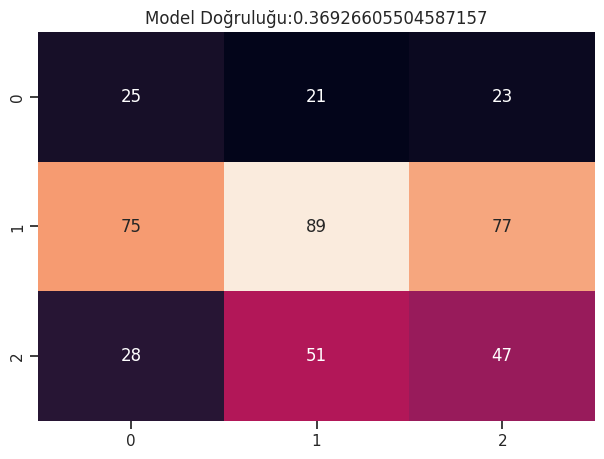

In [59]:
optimize.logresTuned()

Model Dogrulugu: 0.3623853211009174
Classification report
              precision    recall  f1-score   support

           0       0.36      0.33      0.34       141
           1       0.41      0.39      0.40       169
           2       0.31      0.37      0.34       126

    accuracy                           0.36       436
   macro avg       0.36      0.36      0.36       436
weighted avg       0.37      0.36      0.36       436



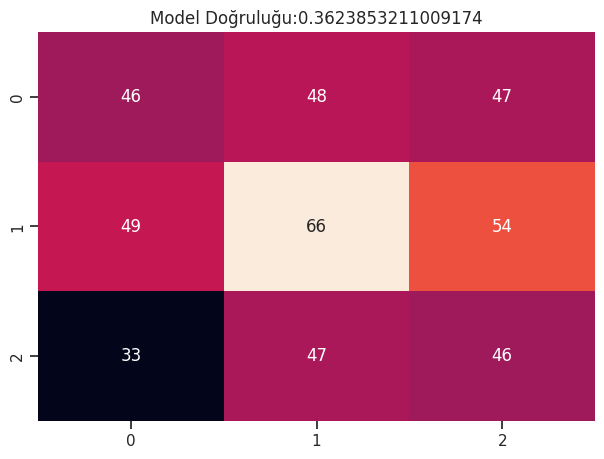

In [60]:
optimize.knnTuned()

Model Dogrulugu: 0.35091743119266056
Classification report
              precision    recall  f1-score   support

           0       0.12      0.42      0.18        36
           1       0.70      0.36      0.47       312
           2       0.18      0.30      0.22        88

    accuracy                           0.35       436
   macro avg       0.33      0.36      0.29       436
weighted avg       0.54      0.35      0.40       436



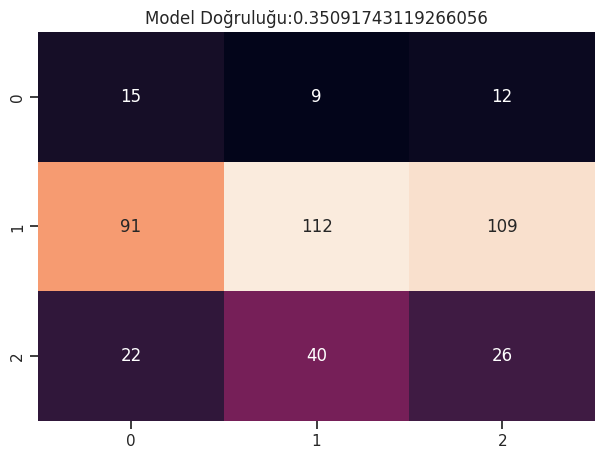

In [61]:
optimize.svmTuned()

Model Dogrulugu: 0.3394495412844037
Classification report
              precision    recall  f1-score   support

           0       0.40      0.31      0.35       162
           1       0.40      0.39      0.40       168
           2       0.22      0.30      0.25       106

    accuracy                           0.34       436
   macro avg       0.34      0.33      0.33       436
weighted avg       0.36      0.34      0.34       436



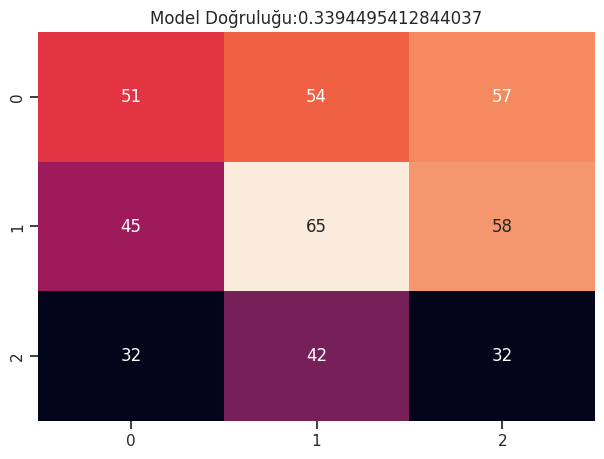

In [62]:
optimize.randomForestTuned()

Model Dogrulugu: 0.36926605504587157
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.37      0.54       436
           2       0.00      0.00      0.00         0

    accuracy                           0.37       436
   macro avg       0.33      0.12      0.18       436
weighted avg       1.00      0.37      0.54       436



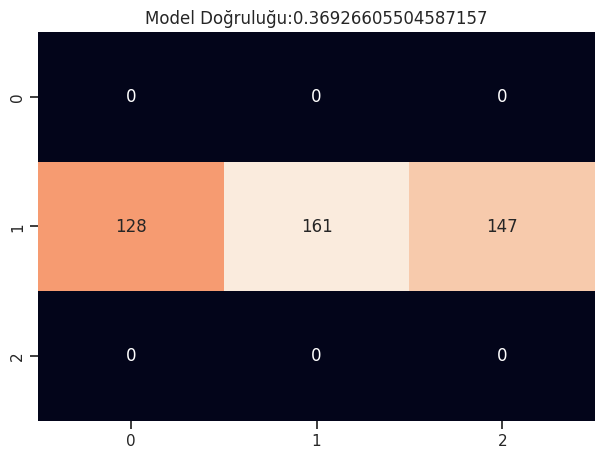

In [63]:
optimize.decisionTreeTuned()

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - accuracy: 0.3488 - loss: 1.1254 - val_accuracy: 0.2972 - val_loss: 1.1092
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3442 - loss: 1.1064 - val_accuracy: 0.2925 - val_loss: 1.1141
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3583 - loss: 1.0916 - val_accuracy: 0.2972 - val_loss: 1.1209
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3753 - loss: 1.0908 - val_accuracy: 0.2783 - val_loss: 1.1305
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3956 - loss: 1.0753 - val_accuracy: 0.2830 - val_loss: 1.1348
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4015 - loss: 1.0834 - val_accuracy: 0.2358 - val_loss: 1.1320
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4508 - loss: 1.0598 - val_accuracy: 0.2642 - val_loss: 1.1467
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4052 - loss: 1.0725 - val_accuracy: 0.2783 - val_los

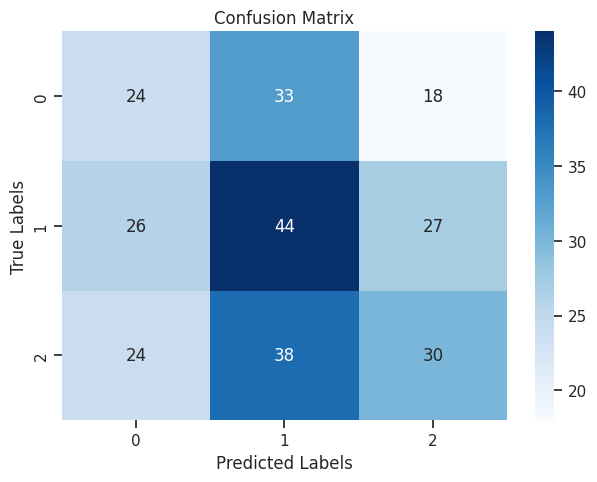

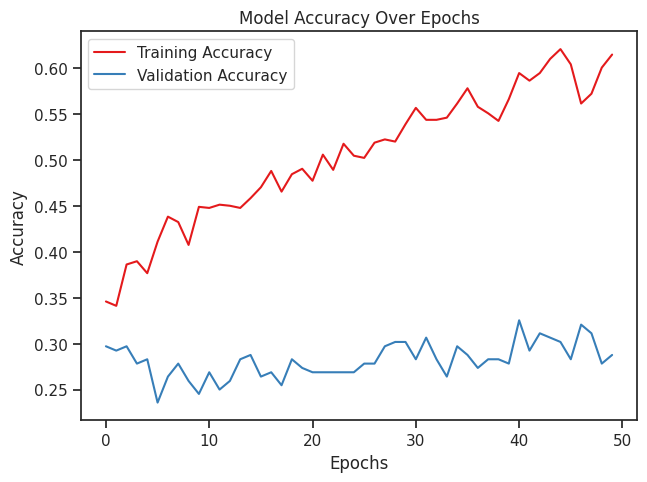

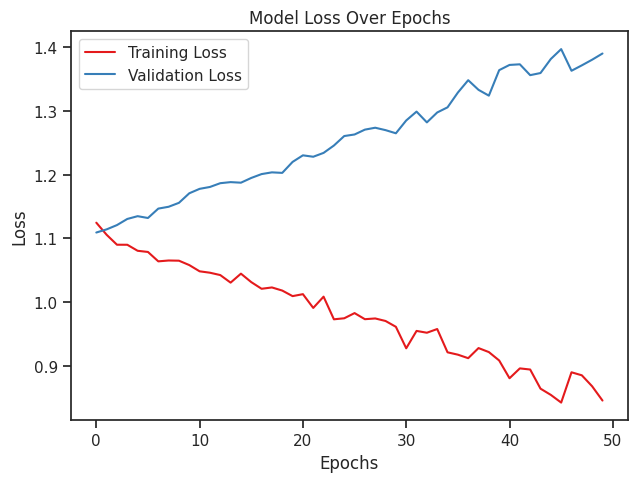

In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
# Datasetiniz zaten df olarak yüklenmiş durumda
# df, önceki işlemlerle hazırlandığını varsayıyoruz

# Hedef ve özellikleri ayır
X = df.drop('User Type', axis=1)
y = df['User Type']

# Hedefi encode et
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Özellikleri normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Derin öğrenme modelini oluştur
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Çok sınıflı çıktı için softmax kullanılır
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Modeli değerlendirme
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Sınıflandırma raporu
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=list(label_encoder.classes_.astype(str))))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Eğitim süreci görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


In [67]:
df.head()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,time_difference_minutes,State of Charge Difference (%)
0,40,60,0.591363,36,13,1,5,29,86,290,28,2.0,0,1,39.0,57
1,50,12,3.133652,30,21,2,1,10,85,110,14,3.0,1,0,121.0,75
2,60,20,2.452653,28,36,2,4,7,70,70,21,2.0,2,1,168.0,63
3,50,80,1.266431,32,13,1,2,83,100,200,38,1.0,1,2,222.0,17
4,50,20,2.019765,10,10,2,2,54,64,200,-8,1.0,1,2,106.0,10


In [72]:
df = pd.read_csv('/content/drive/MyDrive/Article_EV/ev_charging_patterns.csv')
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [73]:
df.isna().sum()  # Eksik değerlerin sayısını kontrol edin
df.fillna(method='ffill', inplace=True)  # Eksik değerleri ileri doldurma yöntemiyle doldurun


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1320 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1320 non-null   float64
 10  Charging Cost (USD)                 

In [75]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]  # Z-skoru 3'ten büyük olanları kaldırma


In [76]:
df = pd.get_dummies(df, columns=['Charging Station Location', 'Charger Type', 'Time of Day', 'Day of Week'], drop_first=True)


In [77]:
# Model başına sabit batarya kapasitelerini içeren harita
battery_capacity_map = {
    "BMW i3": 42.2,
    "Hyundai Kona": 50.0,
    "Chevy Bolt": 65.0,
    "Nissan Leaf": 40.0,
    "Tesla Model 3": 66.0
}

# Batarya kapasitesini güncellemek için map işlemi
df["Battery Capacity (kWh)"] = df["Vehicle Model"].map(battery_capacity_map)

# Güncellenmiş veri setini kontrol etme
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),User Type,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco,Charger Type_Level 1,Charger Type_Level 2,Time of Day_Evening,Time of Day_Morning,Time of Day_Night,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday
0,User_1,BMW i3,42.2,Station_391,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,29.371576,86.119962,293.602111,27.947953,2.0,Commuter,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
1,User_2,Hyundai Kona,50.0,Station_428,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,10.115778,84.664344,112.112804,14.311026,3.0,Casual Driver,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False
2,User_3,Chevy Bolt,65.0,Station_181,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,6.854604,69.917615,71.799253,21.002002,2.0,Commuter,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False
3,User_4,Hyundai Kona,50.0,Station_327,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,83.120003,99.624328,199.577785,38.316313,1.0,Long-Distance Traveler,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False
4,User_5,Hyundai Kona,50.0,Station_108,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,54.258950,63.743786,203.661847,-7.834199,1.0,Long-Distance Traveler,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False


In [78]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))


In [82]:
import pandas as pd

# Assuming df is your DataFrame
# Convert 'Charging Start Time' and 'Charging End Time' to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate the time difference (End Time - Start Time)
df['time_difference'] = df['Charging End Time'] - df['Charging Start Time']

# Extract the time difference in minutes
df['time_difference_minutes'] = df['time_difference'].dt.total_seconds() / 60  # in minutes


df['Charging Duration (Hours)'] = df['time_difference_minutes'] / 60  # Şarj süresi saat olarak

# Create 'Is Weekend' column based on the new one-hot encoded columns
df['Is Weekend'] = df[['Day of Week_Saturday', 'Day of Week_Sunday']].any(axis=1).astype(int)
# Instead of using the original 'Day of Week' column (which has been removed),
# we now check if either 'Day of Week_Saturday' or 'Day of Week_Sunday' is 1.
# If either is True, it means the record is from a weekend, so 'Is Weekend' is set to 1.
# Otherwise, it's set to 0.

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: >

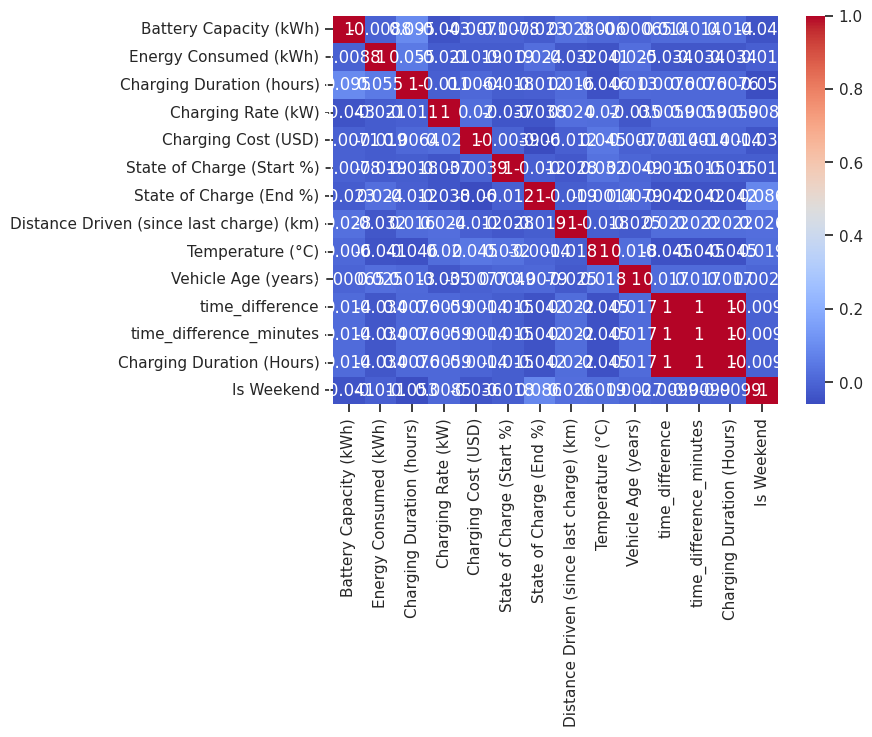

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

# Assuming df is your DataFrame

# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1249 entries, 0 to 1319
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype          
---  ------                                    --------------  -----          
 0   User ID                                   1249 non-null   object         
 1   Vehicle Model                             1249 non-null   object         
 2   Battery Capacity (kWh)                    1249 non-null   float64        
 3   Charging Station ID                       1249 non-null   object         
 4   Charging Start Time                       1249 non-null   datetime64[ns] 
 5   Charging End Time                         1249 non-null   datetime64[ns] 
 6   Energy Consumed (kWh)                     1249 non-null   float64        
 7   Charging Duration (hours)                 1249 non-null   float64        
 8   Charging Rate (kW)                        1249 non-null   float64        
 9   Charging Cost (USD)     

In [88]:
df.drop('User ID', axis=1, inplace=True)
df.drop('Charging Station ID', axis=1, inplace=True)

In [90]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Vehicle Model' column (in place)
df['Vehicle Model'] = label_encoder.fit_transform(df['Vehicle Model'])

# Display the encoded unique values
unique_values = df['Vehicle Model'].unique()
print(unique_values)


[0 2 1 3 4]


In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
# Datasetiniz zaten df olarak yüklenmiş durumda
# df, önceki işlemlerle hazırlandığını varsayıyoruz

# Hedef ve özellikleri ayır
X = df.drop('User Type', axis=1)
y = df['User Type']

# Hedefi encode et
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Özellikleri normalize et
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Derin öğrenme modelini oluştur
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_encoded)), activation='softmax')  # Çok sınıflı çıktı için softmax kullanılır
])

# Modeli derle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Modeli değerlendirme
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Sınıflandırma raporu
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=list(label_encoder.classes_.astype(str))))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Eğitim süreci görselleştirme
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)